# Lab Work 1. ”Power analysis for t-test vs Welch test vs Mann-Whitney test”

t-test and Welch test:

$H_0: \mu_x=\mu_y$

$t=\dfrac{\bar{x}-\bar{y}}{se(\bar{x}-\bar{y})}$


Welch-test: $\sqrt{\frac{\sigma_x^2}{n_x}+\frac{\sigma_y^2}{n_y}}$, d.o.f. = $\frac{\left(S_X^2 / n+S_Y^2 / m\right)^2}{\left(S_X^2 / n\right)^2 /(n-1)+\left(S_Y^2 / m\right)^2 /(m-1)}$

t-test: $\sigma_x=\sigma_y=\sigma_{pooled}$; d.o.f. = $n_x+n_y-2$




MWU:

$H_0: \overline{ranks(x)}=\overline{ranks(y)}$

Only under assumption $F_X$ and $F_y$ have the same shape

$H_0: P(X\leq Y)=1/2$

$H_0: F_X(x)=F_Y(x+a),a=0$

+ Robust



## Nominal Type I Error rates

In [1]:
import numpy as np
import numpy.random as npr

In [99]:
n1=38 #size x
n2=22 #size y
sd2=1.11 #sd x
sd1=1.84 #sd y 
 
m1 = 0 # true
m2 = 0 # true

trueD = (m2 - m1) / (np.sqrt((((n1 - 1) * ((sd1 ** 2))) +
                           (n2 - 1) * ((sd2 ** 2))) / ((n1 + n2) - 2)))
trueD

0.0

In [100]:
sim_x = npr.normal(m1, sd1, n1)  # simulate participants condition x
sim_y = npr.normal(m2, sd2, n2)  # simulate participants condition y

In [101]:
import scipy.stats as sp

In [102]:
sp.ttest_ind(sim_x,sim_y, equal_var=True)

TtestResult(statistic=1.8216148168247364, pvalue=0.0736714849150148, df=58.0)

In [103]:
sp.ttest_ind(sim_x,sim_y, equal_var=False)

TtestResult(statistic=2.082649290676733, pvalue=0.04170437352748916, df=57.98254969052227)

In [104]:
import pingouin as pg

In [105]:
pg.ttest(sim_x,sim_y, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.821615,58,two-sided,0.073671,"[-0.07, 1.44]",0.48801,1.058,0.433172


In [106]:
pg.ttest(sim_x,sim_y, correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.082649,57.98255,two-sided,0.041704,"[0.03, 1.35]",0.48801,1.595,0.433172


In [107]:
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import mannwhitneyu

In [108]:
ttest_ind(sim_x, sim_y, usevar='pooled')

(1.8216148168247361, 0.07367148491501482, 58.0)

In [109]:
sp.levene(sim_x, sim_y, center='mean')
#     ‘median’: recommended for skewed distributions.
#     ‘mean’: recommended for symmetric, moderate-tailed distributions.
#     ‘trimmed’: recommended for heavy-tailed distributions.

LeveneResult(statistic=5.357906385919534, pvalue=0.024189036504650097)

The Levene test is defined as:

$\mathrm{H}_0:$  $\sigma_1^2=\sigma_2^2=\ldots=\sigma_k^2$ 

$\mathrm{H}_{\mathrm{a}}:$  $\sigma_i^2 \neq \sigma_j^2 \quad$ for at least one pair $(i, j)$. 

Test Statistic: Given a variable $Y$ with sample of size & $N$ divided into $k$ subgroups, where $N_i$ is the sample size of the $i$ th subgroup, & the Levene test statistic is defined as: 

 $$W=\frac{(N-k)}{(k-1)} \frac{\sum_{i=1}^k N_i\left(\bar{Z}_{i .}-\bar{Z}_{. .}\right)^2}{\sum_{i=1}^k \sum_{j=1}^{N_i}\left(Z_{i j}-\bar{Z}_{i .}\right)^2}$$

where $\boldsymbol{Z}_{\boldsymbol{i} \boldsymbol{j}}$ can have one of the following three definitions:
1. $Z_{i j}=\left|Y_{i j}-\bar{Y}_{i .}\right|$

where $\bar{Y}_i$, is the mean of the $i$-th subgroup.
2. $Z_{i j}=\left|Y_{i j}-\tilde{Y}_{i .}\right|$

where $\tilde{Y}_i$ is the median of the $i$-th subgroup.
3. $Z_{i j}=\left|Y_{i j}-\bar{Y}_{i .}^{\prime}\right|$

where $\bar{Y}_i^{\prime}$ is the $10 \%$ trimmed mean of the $i$-th subgroup.

$\bar{Z}_{i .}$ are the group means of the $\boldsymbol{Z}_{\boldsymbol{i} \boldsymbol{j}}$ and $\bar{Z}_{. .}$is the overall mean of the $\boldsymbol{Z}_{\boldsymbol{i} \boldsymbol{j}}$.

In [110]:
ttest_ind(sim_x, sim_y,usevar='unequal')

(2.082649290676733, 0.041704373527489146, 57.98254969052226)

In [111]:
mannwhitneyu(sim_x, sim_y, method='exact')

MannwhitneyuResult(statistic=559.0, pvalue=0.030341936291709257)

In [112]:
mannwhitneyu(sim_x, sim_y, method='asymptotic')

MannwhitneyuResult(statistic=559.0, pvalue=0.031141795927887943)

In [113]:
# create variables for dataframe
nSims = 5000 
# set up empty container for all simulated Student's t-test p-values
p1 = [] 
# set up empty container for all simulated Welch's t-test p-values
p2 = [] 
# set up empty container for all simulated MW's p-values 
p3 = []
# set up empty container for Levene's + t 
p4 = []
# set up empty container for all Levene's t-test p-values
pvalueLevene = [] 
for i in range(1, nSims):
    # for each simulated experiment
    sim_x = npr.normal(m1, sd1, n1)  # simulate participants condition x
    sim_y = npr.normal(m2, sd2, n2)  # simulate participants condition y
    # perform Student and Welch t-test and MW
    # perform the tests and store p-value
    p1.append(ttest_ind(sim_x,sim_y, usevar='pooled')[1])
    p2.append(ttest_ind(sim_x,sim_y, usevar='unequal')[1])
    p3.append(mannwhitneyu(sim_x, sim_y, method="exact")[1])
    # perform Levene's test
    if sp.levene(sim_x,sim_y, center='mean')[1] < 0.05:
        p4.append(ttest_ind(sim_x,sim_y, usevar='unequal')[1])
    else:
        p4.append(ttest_ind(sim_x,sim_y, usevar='pooled')[1])
            

    # perform Levene's test
    pvalueLevene.append(sp.levene(sim_x,sim_y, center='mean')[1])

In [114]:
var_ratio = sd1 ** 2 / sd2 ** 2
var_ratio

2.747828909991072

In [115]:
import matplotlib.pyplot as plt

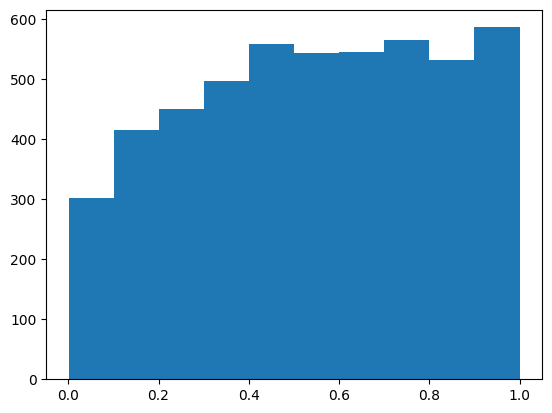

In [116]:
plt.hist(p1);

In [132]:
# Calculate Type 1 error in simulation for Student t-test
errorrate = sum(np.array(p1) < 0.08) / nSims * 100
errorrate

4.6

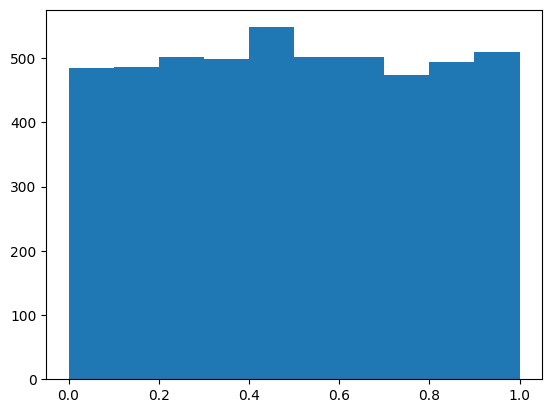

In [124]:
plt.hist(p2);

In [125]:
# Calculate Type 1 error in simulation for Welch t-test
errorrate = sum(np.array(p2) < 0.05) / nSims * 100
errorrate

4.8

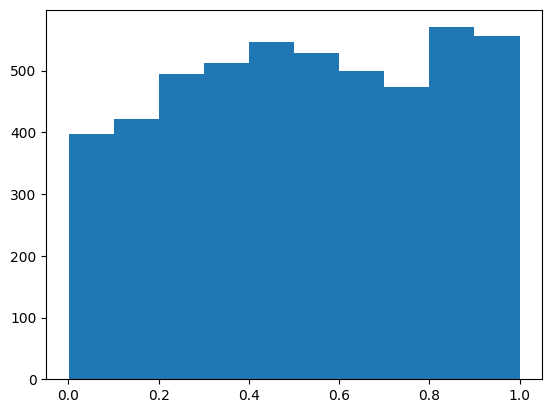

In [120]:
plt.hist(p3);

In [134]:
# Calculate Type 1 error in simulation for MW test
errorrate = sum(np.array(p3) < 0.06) / nSims * 100
errorrate

4.34

In [139]:
# Calculate Type 1 error in simulation for MW test
errorrate = sum(np.array(p4) < 0.055) / nSims * 100
errorrate

4.66

It is clear that this is not the case for Student’s t-test. We see a skewed distribution, with more p-values below 0.05 than there should be (in this example, the true Type 1 error rate is 8.4%, which is already far enough from the nominal 5% level to be problemantic).

 Welch’s t-test doesn’t flinch, and performs just as desired.



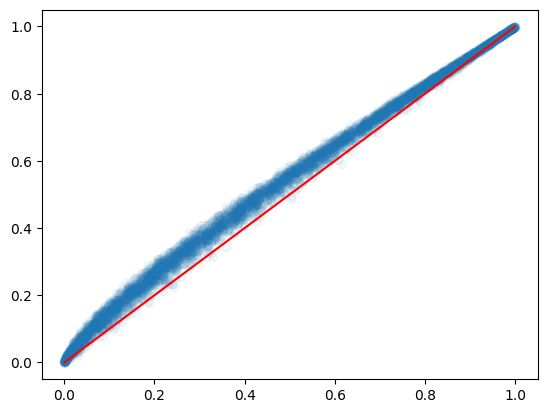

In [54]:
plt.scatter(p1,p2,alpha=0.05)
x = np.linspace(0, 1)
y = x
plt.plot(x, y, color='red')

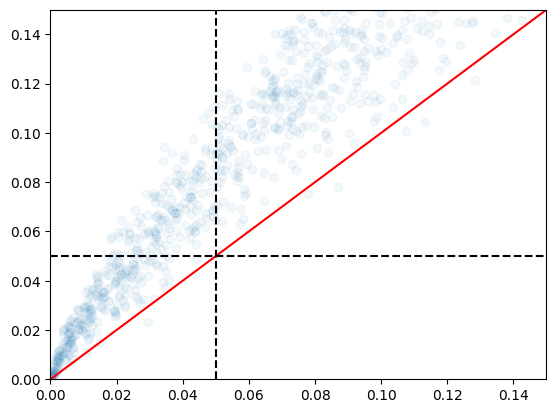

In [55]:
plt.scatter(p1,p2,alpha=0.05)
plt.xlim([0,0.15])
plt.ylim([0,0.15])
x = np.linspace(0, 1)
y = x
plt.plot(x, y, color='red')
plt.axhline(y=0.05, color='k', linestyle='--')
plt.axvline(x=0.05, color='k', linestyle='--')

 We can plot the p-values against each other. Dots fall on the red line when both tests return the same p-value. If the two group sizes are equal, all points fall on this line. **Remember unequal variances are only a problem when group sizes are unequal.** The top left quadrant are all p-values smaller than 0.05 according to a Student’s t-test, but higher than 0.05 according to Welch’s t-test. 
 
**Since Welch’s t-test maintains the nominal Type 1 error rate with unequal variances, the p-values in this quadrant represent the bias in Student’s t-test when groups are unequal and variances are unequal** (i.e., the studies that yield a p < .05 with Student's t-test, but not with Welch's t-test).


The bias works both ways. In the example above, the condition with the larger sample size had the smallest standard deviation. **But when the condition with the larger sample size has the larger standard deviation, the Student’s t-test can return a p-value higher than 0.05, when Welch’s t-test returns a p-value smaller than 0.05** (there is a dip in the number of p-values < 0.05 in the p-value distribution of Student’s t-test, and the majority of the data points fall below the red diagonal line). 

You might argue that as long as Levene’s test warns you that variances are not equal, there is nothing to worry about. **If we examine how often Levene’s test is significant, we see it has a statistical power of only 63% with the sample sizes and standard deviations in this example.** Even though the variances in our simulation are not equal, Levene’s test only reveals this difference in 63% of the tests. **The power depends on the size of the difference in variances (the bigger, the higher the power), and on the sample size (the larger, the higher the power).** That is assuming that people check the assumptions of the t-test to begin with, and report Welch's test when Levene’s test is significant.

Unless you have a very high power (and feel free to use the simulation to calculate what your power would be, given your sample size, for a range of plausible standard deviations), there is no way to be reasonably sure that variances are equal.

If variances are equal, Welch’s t-test and Student’s t-test return the same p-value. **But Type 1 error rates are only one factor to evaluate a test on.** 

The second most important factor is statistical power (with ease of calculation being a third, but Welch's test is always reported in SPSS, so that's not a problem). 

If one test is much more powerful than the other, it can be considered a better test. **Moser, Stevens, & Watts (1989) find that Student's t-test is only slightly more powerful when variances are equal but sample sizes are unequal.** 

- When the difference between sample sizes is huge (e.g., 20 vs 2000 participants) the Student's t-test is a few percent (e.g., 4%) more powerful. 
- However, in most other situations, the difference in power is between 1 and 2 percent, which can be mitigated by just a few (sometimes even 1) additional participant(s) in the smaller group. 

**The only other situation where the Student's t-test is more powerful is when variances and sample sizes are unequal and the larger group has the smaller variance, but in this situation, the Type 1 error rate is inflated in the Student's t-test, so it's not really an option anyway. **

These power differences are therefore not a strong reason to ever use Student's t-test instead of Welch's t-test, unless you can be confident variances are exactly equal.

The idea that a two-step procedure (first performing Levene's test, then deciding which test statistic to report) should be replaced by unconditionally reporting Welch's t-test is generally accepted by statisticians

In [56]:
# Calculate Type 1 error in simulation for Student t-test
var_ratio = sd1 ** 2 / sd2 ** 2
errorrate = sum(np.array(p1) < 0.05) / nSims * 100

In [57]:
var_ratio

0.3639236767485823

In [58]:
errorrate

8.200000000000001

In [59]:
print("The Type 1 error rate (if the true effect is 0) or the power using Student's t-test is ",
    errorrate,
    " with a ratio between the variances of ",
    var_ratio,
    ". Note the nominal Type 1 error rate should be 5%, and equal variances imply a variance ratio of 1")

The Type 1 error rate (if the true effect is 0) or the power using Student's t-test is  8.200000000000001  with a ratio between the variances of  0.3639236767485823 . Note the nominal Type 1 error rate should be 5%, and equal variances imply a variance ratio of 1


Note the nominal Type 1 error rate should be 5%, and equal variances imply a variance ratio of 1

In [60]:
# Calculate Type 1 error in simulation for Welch's t-test
errorrate2 = sum(np.array(p2) < 0.05) / nSims * 100
print("The Type 1 error rate (if the true effect is 0) or the power using Welch's t-test is ",
    errorrate2,
    " with a ratio between the variances of ",
    var_ratio,
    ". Note the nominal Type 1 error rate should be 5%, and equal variances imply a variance ratio of 1")

The Type 1 error rate (if the true effect is 0) or the power using Welch's t-test is  5.08  with a ratio between the variances of  0.3639236767485823 . Note the nominal Type 1 error rate should be 5%, and equal variances imply a variance ratio of 1


In [61]:
errorrate2

5.08

In [62]:
observedpowerLevene = sum(np.array(pvalueLevene) < 0.05) / nSims * 100
print("The observed power for the Levene test is ", observedpowerLevene)

The observed power for the Levene test is  68.88


Even though the variances in our simulation are not equal, Levene’s test only reveals this difference in 63% of the tests.

## Nominal Power

In [140]:
# p3# size condition x
# size condition y
# sd condition x
# sd condition y

n1 = 38 
n2 = 22 
sd2 = 1.11 # true
sd1 = 1.84 # true

m1 = 0 # true
m2 = 1 # true

trueD = (m2 - m1) / (np.sqrt((((n1 - 1) * ((sd1 ** 2))) +
                           (n2 - 1) * ((sd2 ** 2))) / ((n1 + n2) - 2)))
trueD

0.6194730540458323

In [143]:
# catx = rep("x", n1)
# caty = rep("y", n2)
# condition = make_tuple(catx, caty)
# number of simulated experiments (large numbers might take a while)

# create variables for dataframe
nSims = 1000 
# set up empty container for all tests
pow1 = []
pow2 = []
pow3 = []
pow4 = []

effect_sizes = [0.1,0.5,1]

for j in effect_sizes:
    m1 = 0 
    m2 = 0 + j
    p1 = [] 
    p2 = [] 
    p3 = [] 
    p4 = []
    for i in range(1, nSims):
        # for each simulated experiment
        sim_x = npr.normal(m1, sd1, n1)  # simulate participants condition x
        sim_y = npr.normal(m2, sd2, n2)  # simulate participants condition y
        # perform Student and Welch t-test
        # perform the t-test and store p-value
        p1.append(ttest_ind(sim_x,sim_y, usevar='pooled')[1])
        # perform the t-test and store p-value
        p2.append(ttest_ind(sim_x,sim_y, usevar='unequal')[1])
        # perform MW
        p3.append(pg.mwu(sim_x, sim_y, alternative='two-sided').iloc[0,2])
        # perform Levene's test
        if sp.levene(sim_x,sim_y, center='mean')[1] < 0.05:
            p4.append(ttest_ind(sim_x,sim_y, usevar='unequal')[1])
        else:
            p4.append(ttest_ind(sim_x,sim_y, usevar='pooled')[1])
            
        
    pow1.append(sum(np.array(p1) < 0.08) / nSims * 100)
    pow2.append(sum(np.array(p2) < 0.05) / nSims * 100)
    pow3.append(sum(np.array(p3) < 0.06) / nSims * 100)
    pow4.append(sum(np.array(p4) < 0.055) / nSims * 100)
#     powerrate

In [144]:
pow1
# [0.1,0.5,1]

[6.0, 24.099999999999998, 71.39999999999999]

In [145]:
powerrate = sum(np.array(p1) < 0.05) / nSims * 100
powerrate

63.6

In [146]:
powerrate = sum(np.array(p2) < 0.05) / nSims * 100
powerrate

71.3

In [147]:
powerrate = sum(np.array(p3) < 0.05) / nSims * 100
powerrate

63.9

In [148]:
powerrate = sum(np.array(p4) < 0.05) / nSims * 100
powerrate

69.6

In [149]:
import pandas as pd

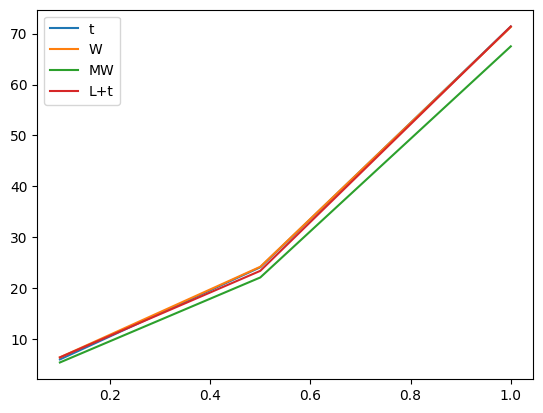

In [150]:
plt.plot(effect_sizes,pd.DataFrame([pow1, pow2, pow3, pow4]).T);
plt.legend(['t','W','MW','L+t'])